In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('owid-covid-data.csv')
print(df.head())
# total values of null entries
data=df.isnull().sum()
# droping null values
clean_df=df.dropna(subset= ['date', 'location', 'total_cases', 'total_deaths','new_cases', 'new_deaths', 'total_vaccinations'])

print(clean_df)



  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [3]:
countries_of_interest = ['Kenya', 'United States', 'India']

# Filter the DataFrame
filtered_df = df[df['location'].isin(countries_of_interest)]

# Preview the result
filtered_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
137635,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
137636,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
137637,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
137638,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
137639,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


In [4]:
# Convert 'date' column to datetime format
filtered_df.loc[:, 'date'] = pd.to_datetime(filtered_df['date'])
filtered_df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
137635,IND,Asia,India,2020-01-03 00:00:00,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
137636,IND,Asia,India,2020-01-04 00:00:00,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
137637,IND,Asia,India,2020-01-05 00:00:00,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
137638,IND,Asia,India,2020-01-06 00:00:00,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
137639,IND,Asia,India,2020-01-07 00:00:00,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


In [39]:
# # Replace missing numeric values with 0
# filtered_df.loc['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations'] =  filtered_df[['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']].fillna(0)


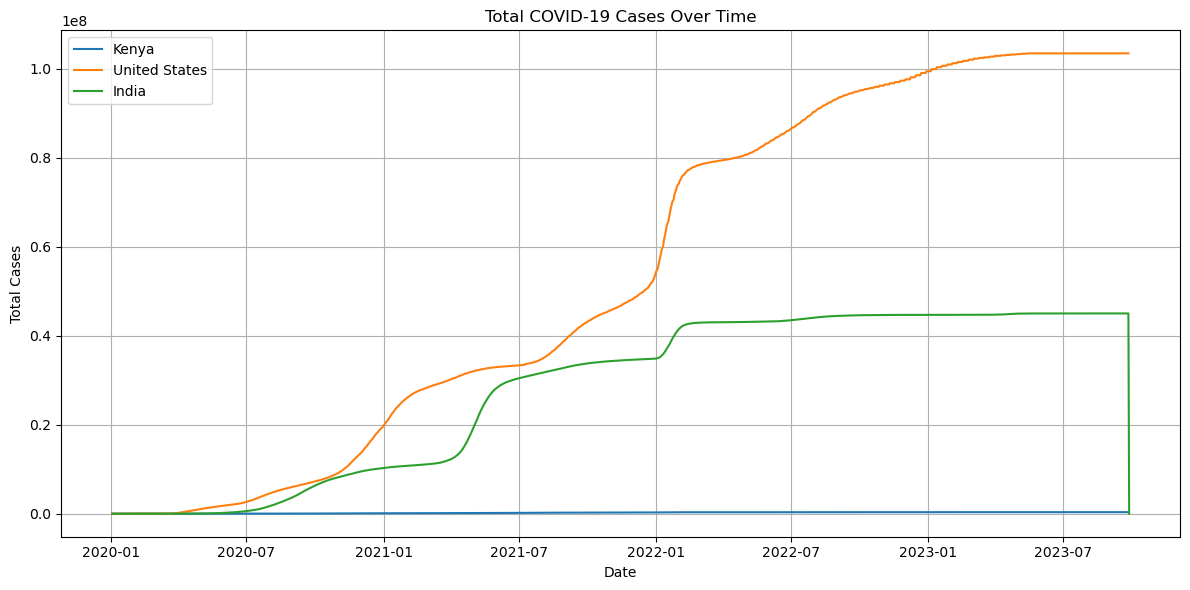

In [31]:
# total cases over time for selected countries
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


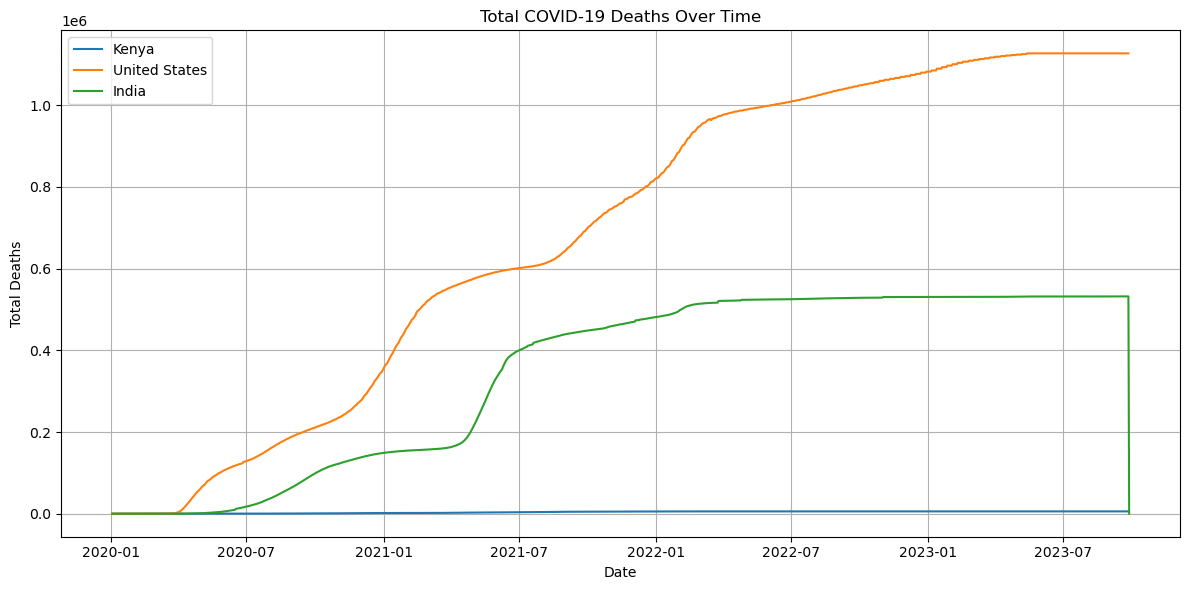

In [32]:
 # total deaths over time.
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


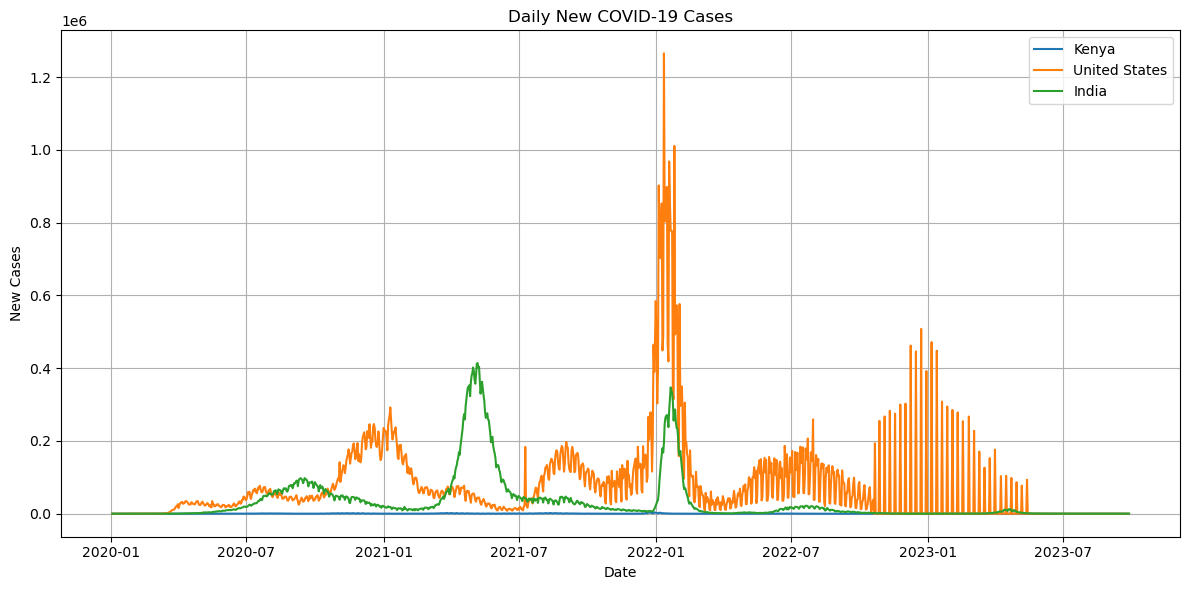

In [33]:
# Compare daily new cases between countries.
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


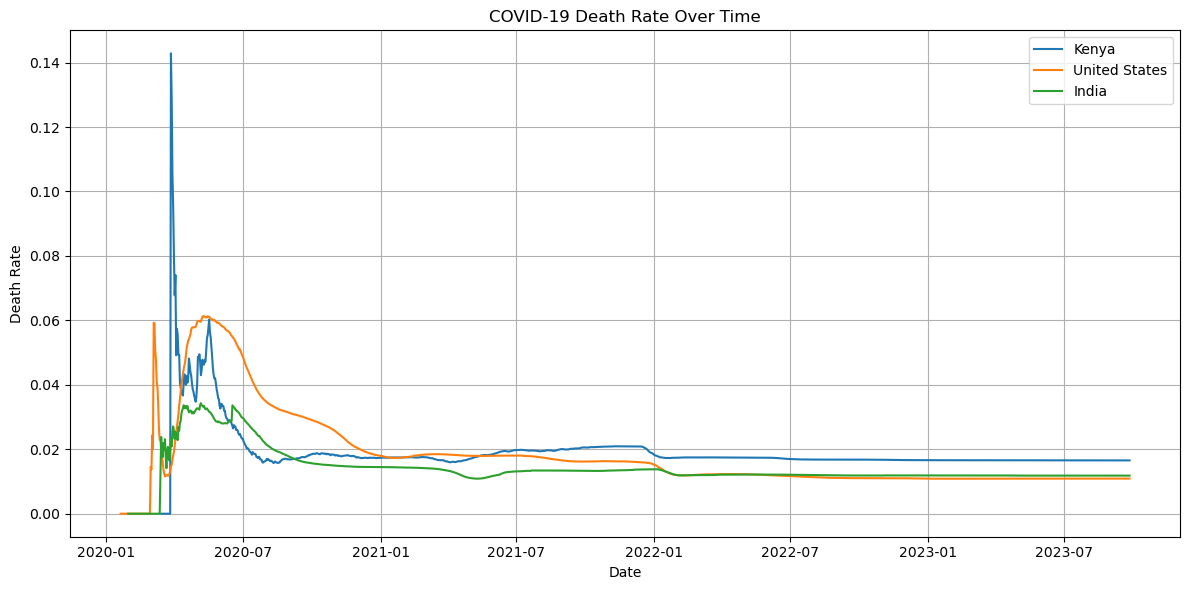

In [36]:
# Compare daily new cases between countries.
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['death_rate'], label=country)

plt.title('Compare daily new cases between countries.')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



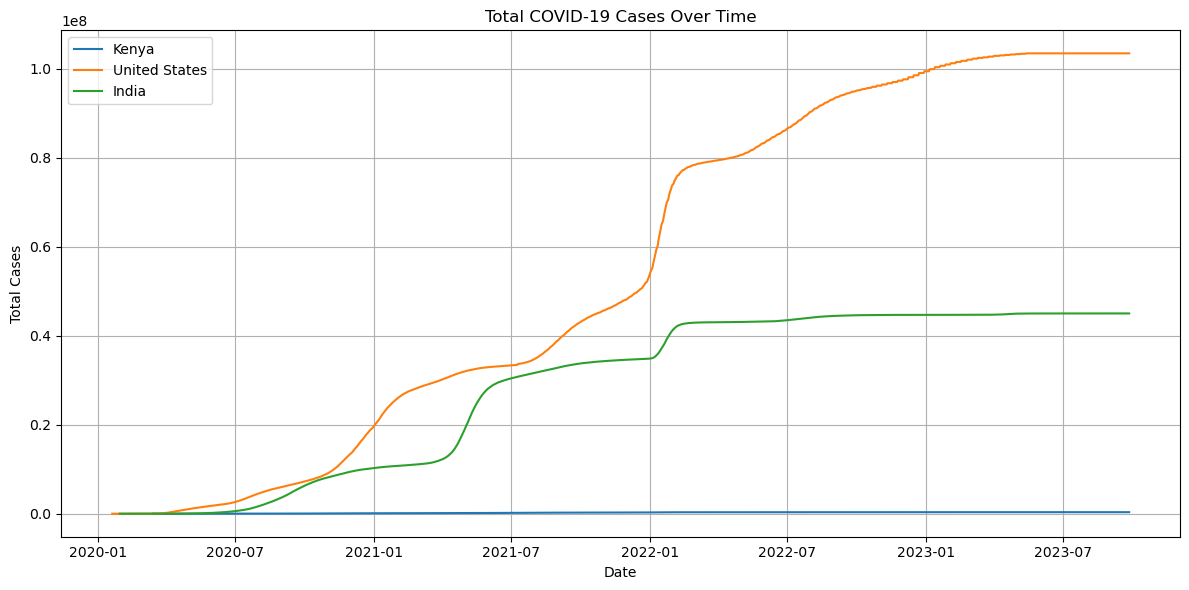

In [16]:
#Total covid 19 cases 
 plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    data = filtered_df[filtered_df['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


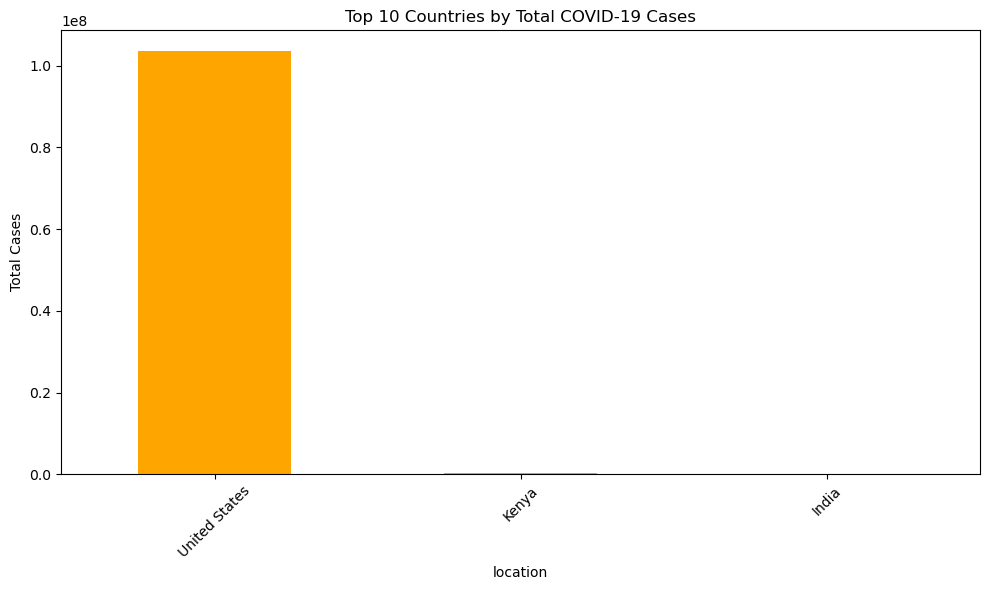

In [41]:
# Get the latest data per country
latest = filtered_df.sort_values('date').groupby('location').last()

# Top 10 countries by total cases
top10 = latest.sort_values('total_cases', ascending=False).head(10)

# Plot
top10['total_cases'].plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



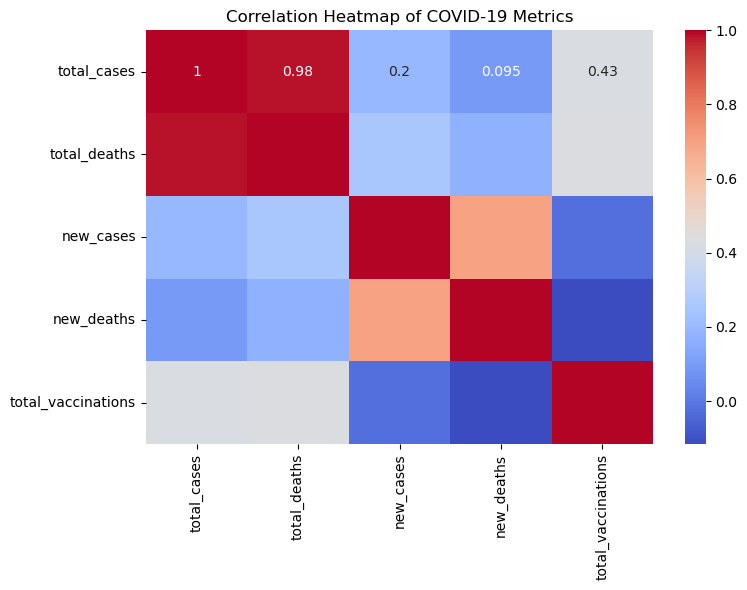

In [42]:
import seaborn as sns

# Correlation matrix for selected numeric columns
numeric_cols = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
corr_matrix = filtered_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of COVID-19 Metrics')
plt.tight_layout()
plt.show()


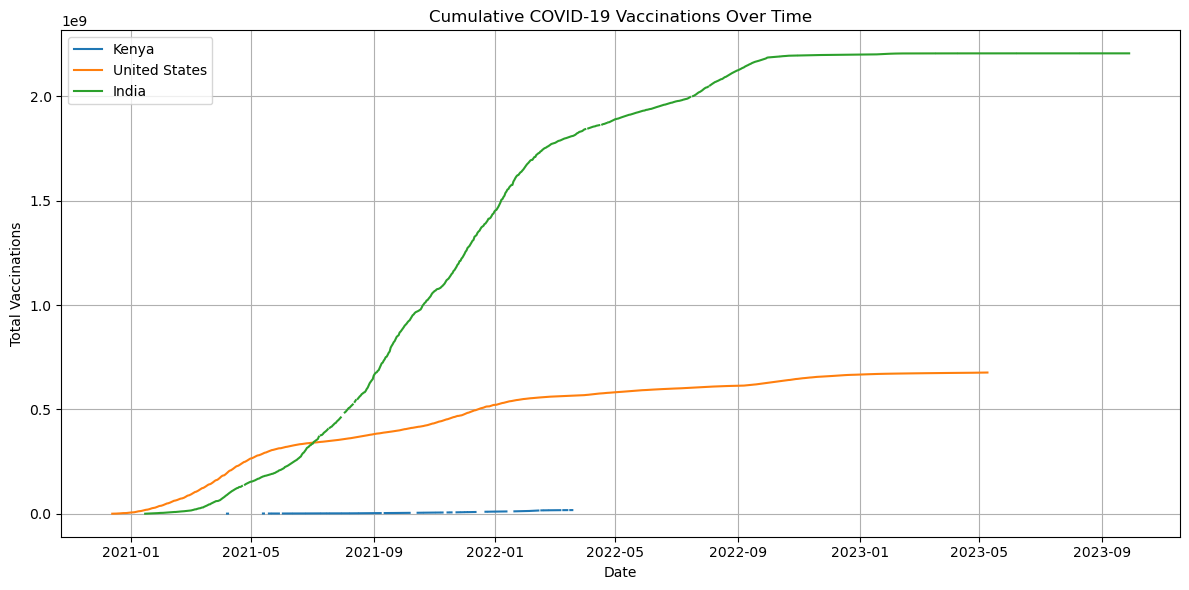

In [8]:

# cumulative vaccinations over time for selected countries.
plt.figure(figsize=(12, 6))

for country in countries_of_interest:
    data = filtered_df[filtered_df['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


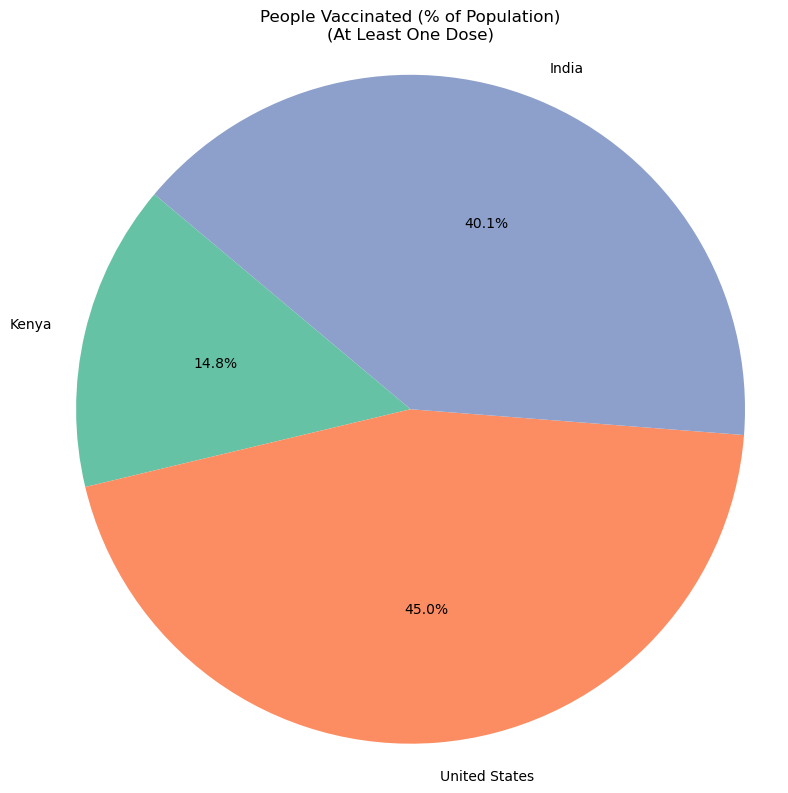

In [17]:

# Step 1: Get the latest data per country
latest_vax = filtered_df.sort_values('date').groupby('location').last()

# Step 2: Extract data
countries_of_interest = ['Kenya', 'United States', 'India']
vaccinated_percent = latest_vax.loc[countries_of_interest, 'people_vaccinated_per_hundred']

# Step 3: Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(vaccinated_percent, labels=countries_of_interest, autopct='%1.1f%%', startangle=140, colors=['#66c2a5','#fc8d62','#8da0cb'])

plt.title('People Vaccinated (% of Population)\n(At Least One Dose)')
plt.axis('equal')  # Equal aspect ratio makes the pie circular
plt.tight_layout()
plt.show()
